In [1]:
%cd ..

D:\Users\alexa\Desktop\projperso\surf\surf-crowd\surfers_detection


In [61]:
from PIL import Image, ImageFile, ImageDraw
import matplotlib.pyplot as plt


def display_image_in_actual_size(im, labels):
    dpi = 80
    #im_data = plt.imread(im_path)
    width, height = im.size

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    for bbox in labels:
        img_draw = ImageDraw.Draw(im)
        img_draw.rectangle(((width * (bbox[1] - bbox[3]/2), height * (bbox[2] - bbox[4]/2)),
                            (width * (bbox[1] + bbox[3]/2), height * (bbox[2] + bbox[4]/2))),
                           outline='Red')
    # Display the image.
    ax.imshow(im, cmap='gray')
    plt.show()

In [5]:
import pandas as pd
import re
import os

df = pd.read_csv("yolov5/runs/detect/exp/all_preds.csv")
df = df["file"].value_counts().reset_index(name='n_surfers_pred')
df.rename(columns={"index": "file"}, inplace=True)
df["date"] = df["file"].apply(lambda x: re.search(r'date_(.*?).jpg', x).group(1))
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d_%H-%M')
df["spot"] = df["file"].apply(lambda x:  re.search(r'spot_(.*?)_date', x).group(1))

In [ ]:
df.sort_values(by="date", inplace=True)

In [39]:
"""
exp_path = "./yolov5/runs/detect/exp"
file_list = []
for file in os.listdir(f"{exp_path}/labels"):
    if file.endswith(".txt"):
        file_list.append(file)
df = []
for file in file_list:
    df.append({"spot": re.search(r'spot_(.*?)_date', file).group(1),
               "date": re.search(r'date_(.*?).txt', file).group(1),
               "file": file})
df = pd.DataFrame(df)
df["n_surfers_pred"] = df.file.apply(lambda x: len(open(f"{exp_path}/labels/"+x).read().splitlines()))
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d_%H-%M')
df.head()
with open(f'{exp_path}/labels/spot_Lacanau_date_2022-07-11_12-31.txt') as f:
    lines = f.read().splitlines()
    print(lines)
"""

'\nexp_path = "./yolov5/runs/detect/exp"\nfile_list = []\nfor file in os.listdir(f"{exp_path}/labels"):\n    if file.endswith(".txt"):\n        file_list.append(file)\ndf = []\nfor file in file_list:\n    df.append({"spot": re.search(r\'spot_(.*?)_date\', file).group(1),\n               "date": re.search(r\'date_(.*?).txt\', file).group(1),\n               "file": file})\ndf = pd.DataFrame(df)\ndf["n_surfers_pred"] = df.file.apply(lambda x: len(open(f"{exp_path}/labels/"+x).read().splitlines()))\ndf[\'date\'] = pd.to_datetime(df.date, format=\'%Y-%m-%d_%H-%M\')\ndf.head()\n'

In [3]:
import plotly.express as px

fig = px.line(df[df.date >= '2022-07-01'], x='date', y="n_surfers_pred", color="spot",
             width=1300, height=800)
fig.show()

AttributeError: 'DataFrame' object has no attribute 'date'

In [31]:
preds_df = pd.read_csv("yolov5/runs/detect/exp/all_preds (1).csv")
df = preds_df
df = df["file"].value_counts().reset_index(name='n_surfers_pred')

df.rename(columns={"index": "file"}, inplace=True)

df["date"] = df["file"].apply(lambda x: re.search(r'val/.*_(2.*).jpg', x).group(1))
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d_%H-%M')
df["spot"] = df["file"].apply(lambda x: re.search(r'val/(spots_(.*?)|(.*?))(_|__)2', x).group(1))

In [32]:
df

,file,n_surfers_pred,date,spot
0,surfers-detection/images/val/Capbreton_Prevent...,86,2022-07-01 10:00:00,Capbreton_Prevent
1,surfers-detection/images/val/Capbreton_Santosh...,82,2022-06-18 09:31:00,Capbreton_Santosha
2,surfers-detection/images/val/spots_Capbreton_S...,69,2022-03-15 12:15:00,spots_Capbreton_Santosha
3,surfers-detection/images/val/Capbreton_Prevent...,54,2022-06-26 08:45:00,Capbreton_Prevent
4,surfers-detection/images/val/Anglet_GrandePlag...,48,2022-07-24 09:51:00,Anglet_GrandePlage
...,...,...,...,...
83,surfers-detection/images/val/spots_Lacanau_202...,1,2022-03-21 08:45:00,spots_Lacanau
84,surfers-detection/images/val/spots_Lacanau_202...,1,2022-03-25 17:00:00,spots_Lacanau
85,surfers-detection/images/val/spots_Anglet_Gran...,1,2022-03-25 10:30:00,spots_Anglet_GrandePlage
86,surfers-detection/images/val/spots_Biarritz_20...,1,2022-03-26 18:30:00,spots_Biarritz


In [33]:
labels_path = "data/splitted_images/annotated/labels/val"
file_list = []
for file in os.listdir(f"{labels_path}"):
    if file.endswith(".txt"):
        file_list.append(file)
print(len(file_list))

df2 = []
for file in file_list:
    df2.append({"spot": re.search(r'(spots_(.*?)|(.*?))(_|__)2', file).group(1),
               "date": re.search(r'_(2.*?).txt', file).group(1),
               "file_label": file})
df2 = pd.DataFrame(df2)
df2["n_surfers_true"] = df2.file_label.apply(lambda x: len(open(f"{labels_path}/"+x).read().splitlines()))
df2['date'] = pd.to_datetime(df2.date,format='%Y-%m-%d_%H-%M')
df2

91


,spot,date,file_label,n_surfers_true
0,Anglet_GrandePlage,2022-06-05 10:45:00,Anglet_GrandePlage__2022-06-05_10-45.txt,4
1,Anglet_GrandePlage,2022-06-05 17:15:00,Anglet_GrandePlage__2022-06-05_17-15.txt,1
2,Anglet_GrandePlage,2022-06-07 14:45:00,Anglet_GrandePlage__2022-06-07_14-45.txt,33
3,Anglet_GrandePlage,2022-06-17 11:15:00,Anglet_GrandePlage__2022-06-17_11-15.txt,24
4,Anglet_GrandePlage,2022-06-27 16:16:00,Anglet_GrandePlage__2022-06-27_16-16.txt,11
...,...,...,...,...
86,spots_Lacanau,2022-03-24 13:15:00,spots_Lacanau_2022-03-24_13-15.txt,3
87,spots_Lacanau,2022-03-25 17:00:00,spots_Lacanau_2022-03-25_17-00.txt,1
88,spots_Lacanau,2022-03-29 08:30:00,spots_Lacanau_2022-03-29_08-30.txt,2
89,spots_Lacanau,2022-03-30 10:31:00,spots_Lacanau_2022-03-30_10-31.txt,2


In [34]:
df2 = df.merge(df2, on=["spot", "date"])

In [35]:
fig = px.scatter(df2, x='n_surfers_true', y="n_surfers_pred", color="spot", custom_data=["file_label"],
             width=1300, height=800)
fig.update_traces(
    hovertemplate="<br>".join([
        "true: %{x}",
        "pred: %{y}",
        "file: %{customdata[0]}",
    ])
)
fig.show()

In [36]:
preds_df

,xmin,ymin,xmax,ymax,confidence,class,name,file
0,1665.746826,855.013000,1676.930420,865.480896,0.885912,0,surfer,surfers-detection/images/val/Anglet_GrandePlag...
1,1398.781128,831.200745,1409.227661,839.229675,0.879914,0,surfer,surfers-detection/images/val/Anglet_GrandePlag...
2,1034.812134,856.884033,1054.372192,865.114624,0.875467,0,surfer,surfers-detection/images/val/Anglet_GrandePlag...
3,656.374573,768.715027,666.766418,773.819641,0.869901,0,surfer,surfers-detection/images/val/Anglet_GrandePlag...
4,704.213501,769.983582,712.810059,776.663635,0.868798,0,surfer,surfers-detection/images/val/Anglet_GrandePlag...
...,...,...,...,...,...,...,...,...
1369,557.406372,772.798767,563.809082,778.853699,0.533215,0,surfer,surfers-detection/images/val/Anglet_GrandePlag...
1370,237.411499,821.461121,243.007996,829.027405,0.526228,0,surfer,surfers-detection/images/val/Anglet_GrandePlag...
1371,553.529907,769.165344,560.772461,774.371887,0.475425,0,surfer,surfers-detection/images/val/Anglet_GrandePlag...
1372,253.498154,810.001160,259.276123,814.975037,0.469715,0,surfer,surfers-detection/images/val/Anglet_GrandePlag...


   n_surfers_pred  n_surfers_true
2              69              71


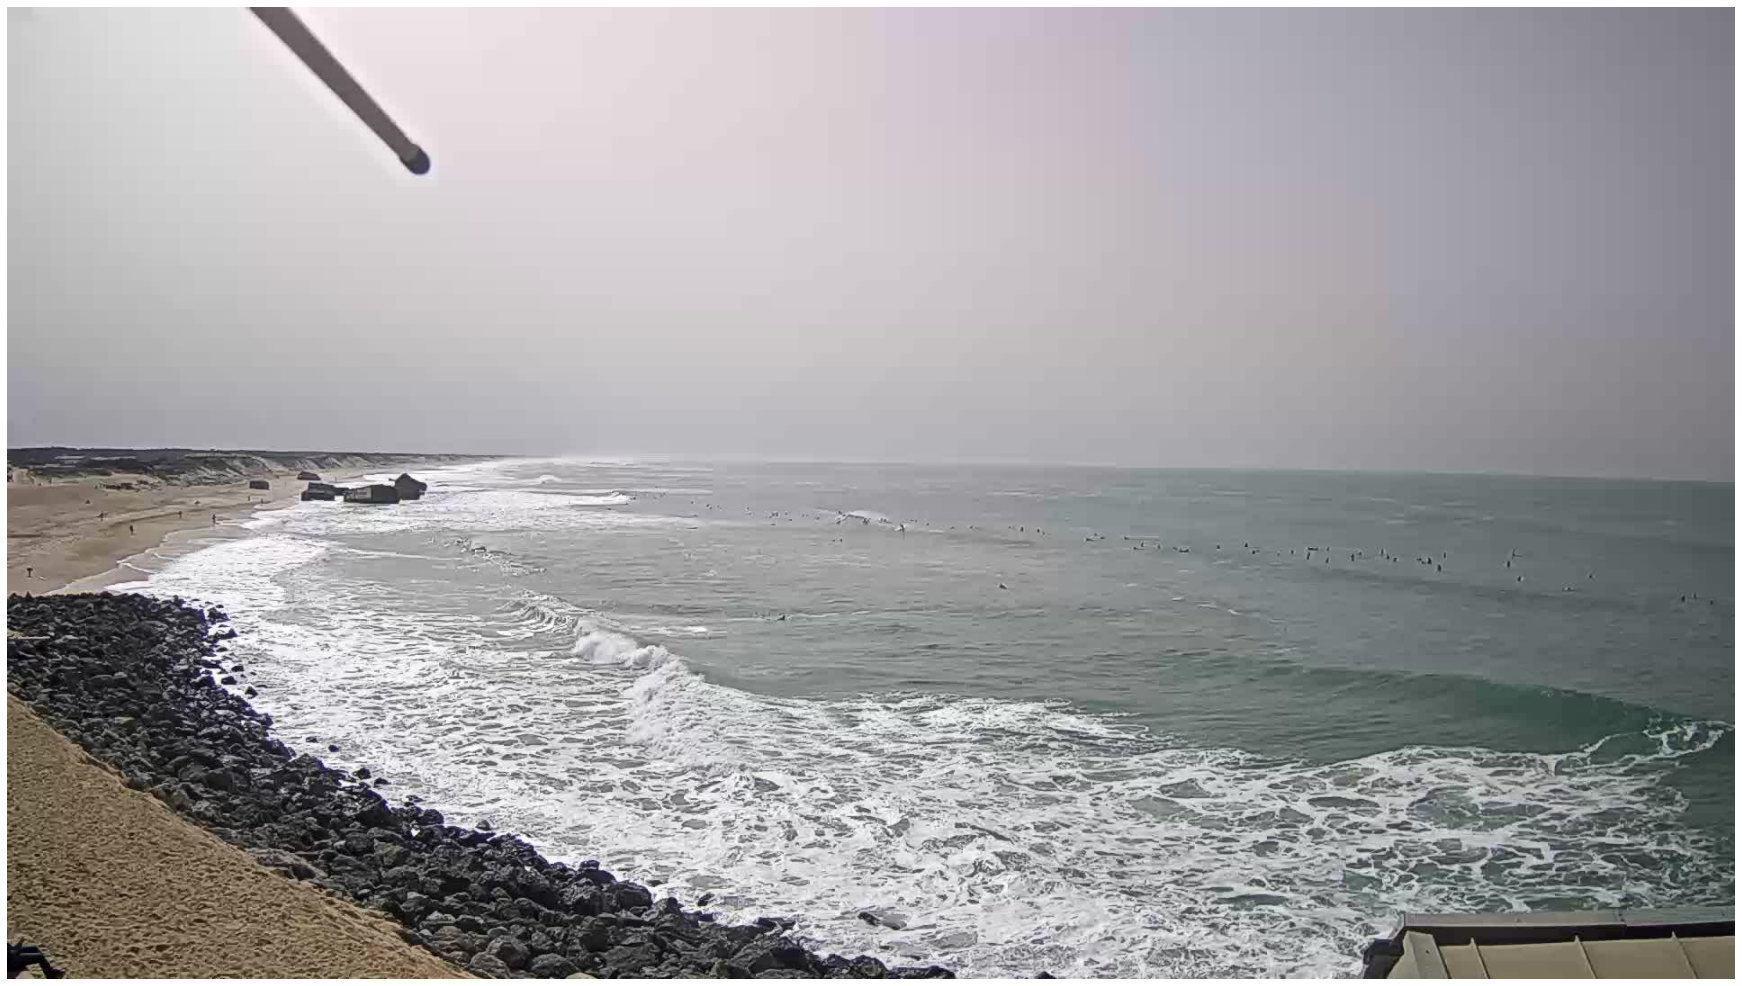

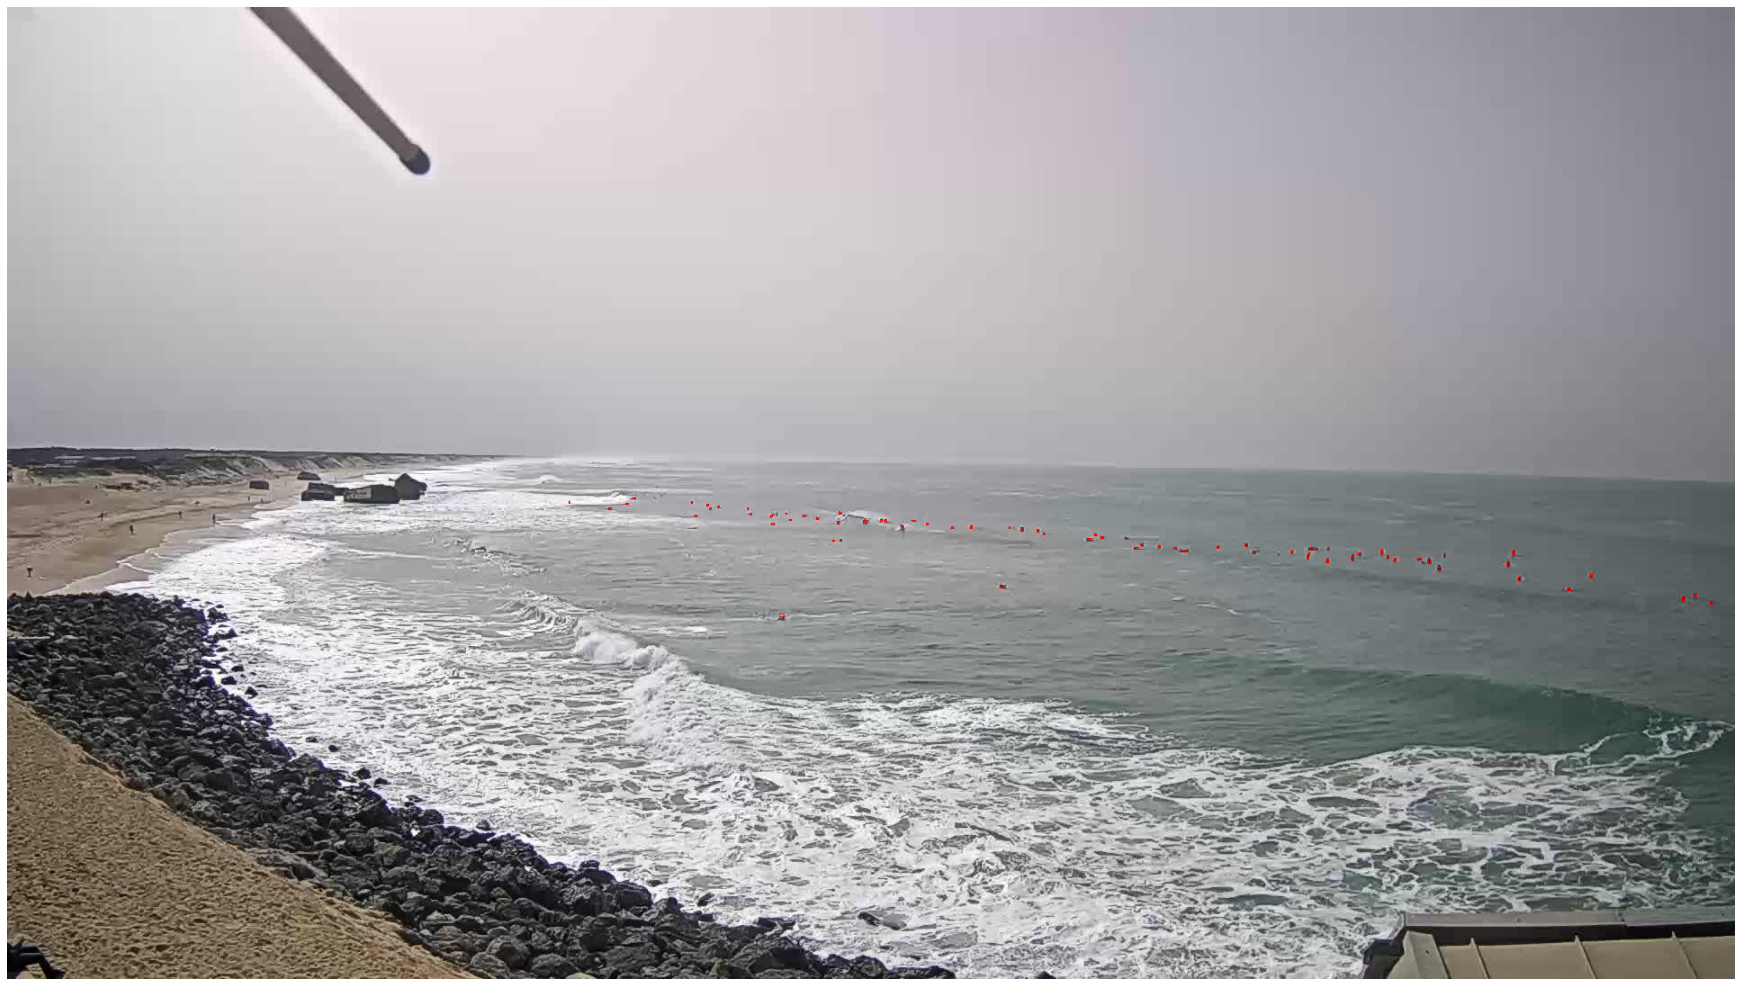

In [85]:
import numpy as np
def show_im_and_pred(preds_df, file):
    df_to_plot = preds_df[preds_df.file == file].copy()
    df_to_plot["xmin"] = df_to_plot["xmin"] / 1920
    df_to_plot["xmax"] = df_to_plot["xmax"] / 1920
    df_to_plot["ymin"] = df_to_plot["ymin"] / 1080
    df_to_plot["ymax"] = df_to_plot["ymax"] / 1080

    labels = np.array(df_to_plot.apply(lambda row: [row["xmin"], row["ymin"], row["xmax"], row["ymax"]], axis=1).tolist())
    converted_labels = labels
    converted_labels[:, 0] = (labels[:, 0] + labels[:, 2]) /2
    converted_labels[:, 1] = (labels[:, 1] + labels[:, 3]) /2
    converted_labels[:, 2] = (labels[:, 2] - labels[:, 0])
    converted_labels[:, 3] = (labels[:, 3] - labels[:, 1])
    labels =  [np.concatenate(([0], label),axis=0) for label in converted_labels]

    print(df2[df2.file==file][["n_surfers_pred", "n_surfers_true"]])

    file = file.replace("surfers-detection", "data/splitted_images/annotated")
    im = Image.open(os.path.join(file))
    display_image_in_actual_size(im, [])
    display_image_in_actual_size(im, labels)

filename = preds_df.sample(1).file.values[0]
show_im_and_pred(preds_df, filename)

In [29]:
from sklearn.metrics import r2_score
r2_score(df2["n_surfers_true"], df2["n_surfers_pred"])

0.8093260776293908

In [30]:
df_temp = df2#[df2.spot == "Lacanau"]
fig = px.histogram((df_temp["n_surfers_true"] - df_temp["n_surfers_pred"]).values, nbins=100)
fig.show()

In [105]:
df2.spot.unique()

array(['Lacanau', 'Capbreton_Santosha', 'Biarritz', 'Capbreton_Prevent',
       'Anglet_GrandePlage'], dtype=object)